In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation, Conv1D, MaxPooling1D, Masking
%matplotlib inline

Using TensorFlow backend.


In [2]:
jet = pd.read_table('../train_data.txt',sep=' ',header=None)
jet.drop([26,27],axis=1,inplace=True)
jet.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train_df = jet
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [3]:
td = pd.read_table('../test_data.txt',sep=' ',header=None)
td.drop([26,27],axis=1,inplace=True)
td.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
td.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [4]:
td.groupby('id').max()['cycle'].min()

21

## Kmeans

In [5]:
from sklearn import cluster

In [6]:
k_cluster = cluster.KMeans(n_clusters=6)

In [7]:
def max_min_normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [8]:
feature = jet[['setting1','setting2','setting3']]
test_feature = td[['setting1','setting2','setting3']]

In [9]:
train_data = np.array(max_min_normalize(feature))
test_data = np.array(max_min_normalize(test_feature))

In [10]:
k_cluster.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
train_mode = pd.DataFrame(k_cluster.labels_)
test_mode = pd.DataFrame(k_cluster.predict(test_data))

In [12]:
train_df['mode1']=0
train_df['mode2']=0
train_df['mode3']=0
train_df['mode4']=0
train_df['mode5']=0
train_df['mode6']=0
train_df.loc[train_mode[0]==0,['mode1','mode2','mode3','mode4','mode5','mode6']]=[1,0,0,0,0,0]
train_df.loc[train_mode[0]==1,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,1,0,0,0,0]
train_df.loc[train_mode[0]==2,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,1,0,0,0]
train_df.loc[train_mode[0]==3,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,0,1,0,0]
train_df.loc[train_mode[0]==4,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,0,0,1,0]
train_df.loc[train_mode[0]==5,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,0,0,0,1]

In [13]:
td['mode1']=0
td['mode2']=0
td['mode3']=0
td['mode4']=0
td['mode5']=0
td['mode6']=0
td.loc[test_mode[0]==0,['mode1','mode2','mode3','mode4','mode5','mode6']]=[1,0,0,0,0,0]
td.loc[test_mode[0]==1,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,1,0,0,0,0]
td.loc[test_mode[0]==2,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,1,0,0,0]
td.loc[test_mode[0]==3,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,0,1,0,0]
td.loc[test_mode[0]==4,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,0,0,1,0]
td.loc[test_mode[0]==5,['mode1','mode2','mode3','mode4','mode5','mode6']]=[0,0,0,0,0,1]

In [14]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
train_df.loc[train_df['RUL']>130,['RUL']]=130
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s19,s20,s21,mode1,mode2,mode3,mode4,mode5,mode6,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,100.00,14.73,8.8071,0,1,0,0,0,0,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,100.00,10.41,6.2665,0,0,0,0,0,1,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,84.93,14.08,8.6723,1,0,0,0,0,0,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,100.00,10.59,6.4701,0,0,0,0,0,1,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,84.93,14.13,8.5286,1,0,0,0,0,0,130


In [15]:
# normalize the columns in the training data.
# MinMax normalization
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s20,s21,mode1,mode2,mode3,mode4,mode5,mode6,RUL,cycle_norm
0,1,1,0.833134,0.997625,1.0,0.060269,0.181576,0.311201,0.273095,0.146592,...,0.156036,0.159082,0.0,1.0,0.0,0.0,0.0,0.0,130,0.000000
1,1,2,0.999767,0.998575,1.0,0.000000,0.131847,0.296600,0.245535,0.000000,...,0.007888,0.014562,0.0,0.0,0.0,0.0,0.0,1.0,130,0.002653
2,1,3,0.595096,0.738480,0.0,0.238089,0.016332,0.035297,0.056997,0.293184,...,0.133745,0.151414,1.0,0.0,0.0,0.0,0.0,0.0,130,0.005305
3,1,4,0.999993,0.999525,1.0,0.000000,0.128269,0.298795,0.246979,0.000000,...,0.014060,0.026144,0.0,0.0,0.0,0.0,0.0,1.0,130,0.007958
4,1,5,0.595137,0.736698,0.0,0.238089,0.014130,0.037871,0.058152,0.293184,...,0.135460,0.143240,1.0,0.0,0.0,0.0,0.0,0.0,130,0.010610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,0.476188,0.831354,1.0,0.626985,0.672172,0.682297,0.591489,0.507937,...,0.486283,0.483993,0.0,0.0,0.0,1.0,0.0,0.0,4,0.824934
53755,260,313,0.238102,0.298100,1.0,0.597937,0.644830,0.733008,0.722934,0.617180,...,0.614540,0.622022,0.0,0.0,0.0,0.0,1.0,0.0,3,0.827586
53756,260,314,0.595222,0.736342,0.0,0.238089,0.017892,0.088067,0.082198,0.293184,...,0.137517,0.144474,1.0,0.0,0.0,0.0,0.0,0.0,2,0.830239
53757,260,315,0.595203,0.738717,0.0,0.238089,0.021195,0.079155,0.102368,0.293184,...,0.132716,0.134383,1.0,0.0,0.0,0.0,0.0,0.0,1,0.832891


In [16]:
# normalize the columns in the test data.
# MinMax normalization
td['cycle_norm'] = td['cycle']
cols_normalize = td.columns.difference(['id','cycle'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(td[cols_normalize]), 
                             columns=cols_normalize, 
                             index=td.index)
join_df = td[td.columns.difference(cols_normalize)].join(norm_train_df)
td = join_df.reindex(columns = td.columns)
td

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s19,s20,s21,mode1,mode2,mode3,mode4,mode5,mode6,cycle_norm
0,1,1,0.238019,0.297150,1.0,0.597937,0.639243,0.691329,0.680395,0.617180,...,1.0,0.625944,0.630724,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
1,1,2,0.476162,0.831354,1.0,0.626985,0.664861,0.647519,0.534663,0.507937,...,1.0,0.484214,0.496301,0.0,0.0,0.0,1.0,0.0,0.0,0.002732
2,1,3,0.833282,0.997625,1.0,0.060269,0.189055,0.312512,0.243225,0.146592,...,1.0,0.164722,0.159476,0.0,1.0,0.0,0.0,0.0,0.0,0.005464
3,1,4,0.999967,0.998812,1.0,0.000000,0.135525,0.286753,0.242061,0.000000,...,1.0,0.005834,0.016866,0.0,0.0,0.0,0.0,0.0,1.0,0.008197
4,1,5,0.595089,0.737886,0.0,0.238089,0.012028,0.022001,0.050986,0.293184,...,0.0,0.141730,0.140123,1.0,0.0,0.0,0.0,0.0,0.0,0.010929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,0.833210,0.997981,1.0,0.060269,0.185015,0.331523,0.245972,0.146592,...,1.0,0.163349,0.159133,0.0,1.0,0.0,0.0,0.0,0.0,0.322404
33987,259,120,0.999967,0.998219,1.0,0.000000,0.128638,0.290703,0.232087,0.000000,...,1.0,0.013384,0.016260,0.0,0.0,0.0,0.0,0.0,1.0,0.325137
33988,259,121,0.999955,0.997625,1.0,0.000000,0.130750,0.285244,0.219835,0.000000,...,1.0,0.013384,0.020433,0.0,0.0,0.0,0.0,0.0,1.0,0.327869
33989,259,122,0.000057,0.000356,1.0,1.000000,0.984024,0.944915,0.935747,1.000000,...,1.0,0.991764,0.985410,0.0,0.0,1.0,0.0,0.0,0.0,0.330601


### 准备输入

In [17]:
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s20,s21,mode1,mode2,mode3,mode4,mode5,mode6,RUL,cycle_norm
0,1,1,0.833134,0.997625,1.0,0.060269,0.181576,0.311201,0.273095,0.146592,...,0.156036,0.159082,0.0,1.0,0.0,0.0,0.0,0.0,130,0.000000
1,1,2,0.999767,0.998575,1.0,0.000000,0.131847,0.296600,0.245535,0.000000,...,0.007888,0.014562,0.0,0.0,0.0,0.0,0.0,1.0,130,0.002653
2,1,3,0.595096,0.738480,0.0,0.238089,0.016332,0.035297,0.056997,0.293184,...,0.133745,0.151414,1.0,0.0,0.0,0.0,0.0,0.0,130,0.005305
3,1,4,0.999993,0.999525,1.0,0.000000,0.128269,0.298795,0.246979,0.000000,...,0.014060,0.026144,0.0,0.0,0.0,0.0,0.0,1.0,130,0.007958
4,1,5,0.595137,0.736698,0.0,0.238089,0.014130,0.037871,0.058152,0.293184,...,0.135460,0.143240,1.0,0.0,0.0,0.0,0.0,0.0,130,0.010610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,0.476188,0.831354,1.0,0.626985,0.672172,0.682297,0.591489,0.507937,...,0.486283,0.483993,0.0,0.0,0.0,1.0,0.0,0.0,4,0.824934
53755,260,313,0.238102,0.298100,1.0,0.597937,0.644830,0.733008,0.722934,0.617180,...,0.614540,0.622022,0.0,0.0,0.0,0.0,1.0,0.0,3,0.827586
53756,260,314,0.595222,0.736342,0.0,0.238089,0.017892,0.088067,0.082198,0.293184,...,0.137517,0.144474,1.0,0.0,0.0,0.0,0.0,0.0,2,0.830239
53757,260,315,0.595203,0.738717,0.0,0.238089,0.021195,0.079155,0.102368,0.293184,...,0.132716,0.134383,1.0,0.0,0.0,0.0,0.0,0.0,1,0.832891


In [18]:
train_df.groupby('id').max()['cycle'].min()

128

In [19]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191

In [20]:
# pick the feature columns 
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3','cycle_norm','mode1','mode2','mode3','mode4','mode5','mode6']
# sequence_cols = ['setting1', 'setting2', 'setting3','cycle_norm']
sequence_cols.extend(sensor_cols)

In [21]:
sequence_length = 50

In [22]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols)) 
           for id in train_df['id'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(40759, 50, 31)

In [23]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [24]:
# generate labels
label_gen = [gen_labels(train_df[train_df['id']==id], sequence_length, ['RUL']) 
             for id in train_df['id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
print(label_array)

[[98.]
 [97.]
 [96.]
 ...
 [ 2.]
 [ 1.]
 [ 0.]]


### Build model with mask

In [25]:
import keras.backend as K
import tensorflow as tf 

In [26]:
# multi CPU
num_cores = 8
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=num_cores, inter_op_parallelism_threads=num_cores,
                        allow_soft_placement=True, device_count={'CPU': 8})
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [27]:
def r2_keras(y_true, y_pred):
    """Coefficient of Determination 
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [93]:
# Build model with mask
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(Masking(mask_value=0., input_shape=(sequence_length, nb_features)))

model.add(LSTM(
         units=80,
         return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(
          units=40,
          return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])
# model.compile(loss=scoring_error, optimizer='rmsprop',metrics=['mae',r2_keras])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 50, 31)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 80)            35840     
_________________________________________________________________
lstm_4 (LSTM)                (None, 40)                19360     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 55,241
Trainable params: 55,241
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
model.load_weights('re_use_mask.h5')

In [102]:
# fit the network
# model_path='re_use_mask.h5'
history = model.fit(seq_array, label_array, epochs=100, batch_size=800, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint('re_use_mask2.h5',monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())

Train on 38721 samples, validate on 2038 samples
Epoch 1/100
 - 44s - loss: 379.8618 - mean_absolute_error: 14.5843 - r2_keras: 0.7906 - val_loss: 533.9135 - val_mean_absolute_error: 18.0422 - val_r2_keras: 0.7202
Epoch 2/100
 - 43s - loss: 309.8015 - mean_absolute_error: 13.6238 - r2_keras: 0.8292 - val_loss: 535.6254 - val_mean_absolute_error: 18.9967 - val_r2_keras: 0.7156
Epoch 3/100
 - 43s - loss: 282.6594 - mean_absolute_error: 13.0499 - r2_keras: 0.8440 - val_loss: 591.0223 - val_mean_absolute_error: 19.0997 - val_r2_keras: 0.6922
Epoch 4/100
 - 43s - loss: 289.6594 - mean_absolute_error: 13.0662 - r2_keras: 0.8401 - val_loss: 530.3170 - val_mean_absolute_error: 18.2393 - val_r2_keras: 0.7213
Epoch 5/100
 - 44s - loss: 286.0920 - mean_absolute_error: 13.0911 - r2_keras: 0.8422 - val_loss: 508.9895 - val_mean_absolute_error: 17.4990 - val_r2_keras: 0.7315
Epoch 6/100
 - 42s - loss: 282.5144 - mean_absolute_error: 12.8987 - r2_keras: 0.8441 - val_loss: 512.6234 - val_mean_absolute

KeyboardInterrupt: 

In [47]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Loss: {}'.format(scores[0]))

40759/40759 [==============================] - 29s 705us/step
Loss: 329.50660247229956


In [1]:
from matplotlib import pyplot

In [6]:
train = [5714,4603,3705,2983,2443,2078,1889,1852,1841,1627,1292,1150,952,884,829,807,776,760,752,725,1039,1112,731,680,657,626,611,582,568,542,525,496,471,454,442,414,399,381,370,352,343,336,318,305,298,283,275,262,246]
val  = [5832,4743,3839,3113,2560,2187,2001,1940,1729,1701,1718,1450,1630,1326,1243,1213,1475,1045,1031,1004,870,1744,1034,964,868,861,761,797,1139,781,757,636,776,575,663,632,678,558,373,556,624,960,507,370,387,387,396,337,358,317]

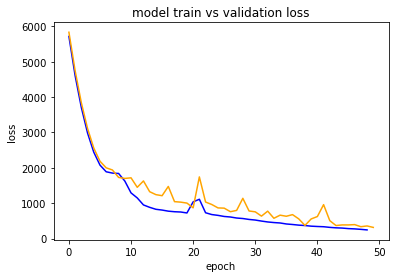

In [7]:
# train = pd.DataFrame()
# val = pd.DataFrame()
# train[str(i)] = history.history['loss']
# val[str(i)] = history.history['val_loss']
# # plot train and validation loss across multiple runs
pyplot.plot(train, color='blue', label='train')
pyplot.plot(val, color='orange', label='validation')
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.show()

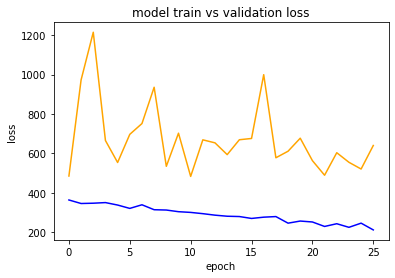

In [86]:
train = pd.DataFrame()
val = pd.DataFrame()
train[str(i)] = history.history['loss']
val[str(i)] = history.history['val_loss']
# plot train and validation loss across multiple runs
pyplot.plot(train, color='blue', label='train')
pyplot.plot(val, color='orange', label='validation')
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.show()

### Use padding in test samples

In [103]:
td

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s19,s20,s21,mode1,mode2,mode3,mode4,mode5,mode6,cycle_norm
0,1,1,0.238019,0.297150,1.0,0.597937,0.639243,0.691329,0.680395,0.617180,...,1.0,0.625944,0.630724,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
1,1,2,0.476162,0.831354,1.0,0.626985,0.664861,0.647519,0.534663,0.507937,...,1.0,0.484214,0.496301,0.0,0.0,0.0,1.0,0.0,0.0,0.002732
2,1,3,0.833282,0.997625,1.0,0.060269,0.189055,0.312512,0.243225,0.146592,...,1.0,0.164722,0.159476,0.0,1.0,0.0,0.0,0.0,0.0,0.005464
3,1,4,0.999967,0.998812,1.0,0.000000,0.135525,0.286753,0.242061,0.000000,...,1.0,0.005834,0.016866,0.0,0.0,0.0,0.0,0.0,1.0,0.008197
4,1,5,0.595089,0.737886,0.0,0.238089,0.012028,0.022001,0.050986,0.293184,...,0.0,0.141730,0.140123,1.0,0.0,0.0,0.0,0.0,0.0,0.010929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,0.833210,0.997981,1.0,0.060269,0.185015,0.331523,0.245972,0.146592,...,1.0,0.163349,0.159133,0.0,1.0,0.0,0.0,0.0,0.0,0.322404
33987,259,120,0.999967,0.998219,1.0,0.000000,0.128638,0.290703,0.232087,0.000000,...,1.0,0.013384,0.016260,0.0,0.0,0.0,0.0,0.0,1.0,0.325137
33988,259,121,0.999955,0.997625,1.0,0.000000,0.130750,0.285244,0.219835,0.000000,...,1.0,0.013384,0.020433,0.0,0.0,0.0,0.0,0.0,1.0,0.327869
33989,259,122,0.000057,0.000356,1.0,1.000000,0.984024,0.944915,0.935747,1.000000,...,1.0,0.991764,0.985410,0.0,0.0,1.0,0.0,0.0,0.0,0.330601


In [104]:
len(td.groupby('id'))

259

In [106]:
test = []
for i in range(len(td.groupby('id'))):
    if len(td[td['id']==(i+1)]) >= sequence_length:
        test.append(np.asarray(td[td['id']==(i+1)][sequence_cols].values[-sequence_length:]).astype(np.float32).tolist())
    else:
        test.append(np.asarray(td[td['id']==(i+1)][sequence_cols].values[:]).astype(np.float32).tolist())

In [107]:
padded_inputs = keras.preprocessing.sequence.pad_sequences(test,dtype='float32',                                padding='post')

In [108]:
model.load_weights('re_use_mask2.h5')

In [109]:
result = model.predict(padded_inputs,verbose=1)

259/259 [==============================] - 0s 2ms/step


## .csv

In [110]:
import time

In [111]:
submit = pd.read_excel('../results_submission.xls')
submit['RUL prediction']=result
submit.to_csv('re_use_mask.csv')

## 算分

In [112]:
ans = np.loadtxt('../RUL_FD002.txt')
ans.shape

(259,)

In [113]:
def score(user_ans):
    user_ans_arr = np.array(user_ans)
    score = 0
    diff = user_ans_arr - ans
    diff_pos = diff[diff>=0]
    diff_neg = diff[diff<0]
    score = np.sum((np.exp(-1./13.*diff_neg)-1))+np.sum((np.exp(1./10.*diff_pos)-1))
    return score

In [115]:
re = pd.read_csv('./re_use_mask.csv')
pred_rul=re['RUL prediction']

In [116]:
score(pred_rul)

9953.829389024435